# Degeneration effect : repeated avatarization on AIDS -Python

In order to look at the effect of an avatarization, we avatarized an avatarized dataset.  
We repeat this operation multiple times.

This notebook generate the avatarze dataset and visualize results.

## Importation 

In [9]:
from lsg import avatarize
import pandas as pd
import seaborn as sns
from lsg.imputation import impute_missing
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Patch

import sys

sys.path.append("../..")
from dimension import Projection


from matplotlib.patches import Patch, Ellipse
import matplotlib.transforms as transforms




##  Loading

In [10]:
df = pd.read_csv("../../datasets/AIDS/aids_original_data.csv", sep=";")
df.drop(columns="pidnum", inplace=True)

categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

df[categorical_val] = df[categorical_val].astype("category")

In [13]:
df_all = pd.read_csv("../../datasets/messageD/aids.csv")
df_all[categorical_val] = df_all[categorical_val].astype("category")

In [14]:
# select specifics iterations

df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_5 = df_all[df_all["iter"] == 5]
df_7 = df_all[df_all["iter"] == 7]
df_10 = df_all[df_all["iter"] == 10]



# Impute missing data in order to project the avatars in the multidimensionnal space.

df_0_imp = impute_missing(df_0, k_impute=5)
df_1_imp = impute_missing(df_1, k_impute=5)
df_2_imp = impute_missing(df_2, k_impute=5)
df_3_imp = impute_missing(df_3, k_impute=5)
df_5_imp = impute_missing(df_5, k_impute=5)
df_7_imp = impute_missing(df_7, k_impute=5)
df_10_imp = impute_missing(df_10, k_impute=5)


## Multdimensionnal projection function : requiered dimension projection local function.

This section use projections function (such as FAMD for mixed data) to projecte the avatar data in the original data space.

In [15]:
palette = sns.light_palette("#02297a", as_cmap=True)


def projection_plot(
    records_set, avatars_set, variable_visualization, iter, palette=palette
):
    """
    Project the avatar dataset as supplemental individuals in the original daataset.
    Can color the individuals with a variable.
    input :
    - records_set : original dataset
    - avatars_set : avatar dataset
    - iter : the iteration number
    - palette : a color palette

    output:
    - ax1 : the projection of the avatar dataset.
    """

    new_ind = [
        48,
        8009.8128,
        0,
        0,
        0,
        100,
        0,
        0,
        1,
        1500,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
    ]
    new_ind = pd.Series(new_ind, index=avatars_set.columns)
    avatars_set = avatars_set.append(new_ind, ignore_index=True)

    pr = Projection()
    __, mod = pr.fit_transform(records_set, nf=3)
    avat_coordinates = mod.transform(avatars_set)
    avat_coordinates["Dim. 1"] = -avat_coordinates["Dim. 1"]
    var1 = pr.model.explained_variance_ratio[0] * 100
    var2 = pr.model.explained_variance_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization].values

    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=3, rc=paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
        fig = plt.figure(figsize=(13, 10))  # create a figure object
        ax1 = fig.add_subplot()

    ax1 = sns.scatterplot(
        x="Dim. 1",
        y="Dim. 2",
        data=avat_coordinates,
        hue="modality",
        alpha=1,
        palette=palette,
        edgecolor="#1D1D1B",
        hue_norm=(0, 1500),
    )
    ax1.set_xlim(
        avat_coordinates["Dim. 1"].min() - 0.2, avat_coordinates["Dim. 1"].max() + 0.2
    )
    ax1.set_ylim(
        avat_coordinates["Dim. 2"].min() - 0.2, avat_coordinates["Dim. 2"].max() + 0.2
    )
    plt.xlabel("Dim. 1 (" + str(round(var1)) + "%)")
    plt.ylabel("Dim. 2 (" + str(round(var2)) + "%)")
    ax1.set(xlim=(-6, 6))
    ax1.set(ylim=(-6, 6))
    ax1.legend(
        range(0, 2500, 500),
    )

    plt.legend(loc="lower right")

    ax1.set_title("Iteration: {}".format(iter))
    return ax1

Regarding variables types, a FAMD is performed for dimension reduction


<AxesSubplot:title={'center':'Iteration: 0'}, xlabel='Dim. 1 (13%)', ylabel='Dim. 2 (10%)'>

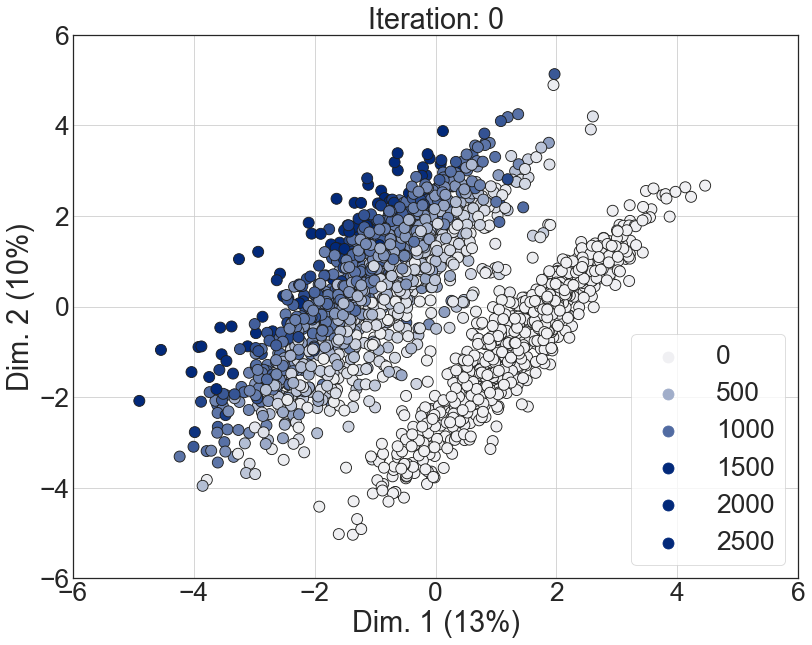

In [16]:
projection_plot(df_0_imp, df_0_imp, "preanti", 0)

## Iterations vizualisation

Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 432x288 with 0 Axes>

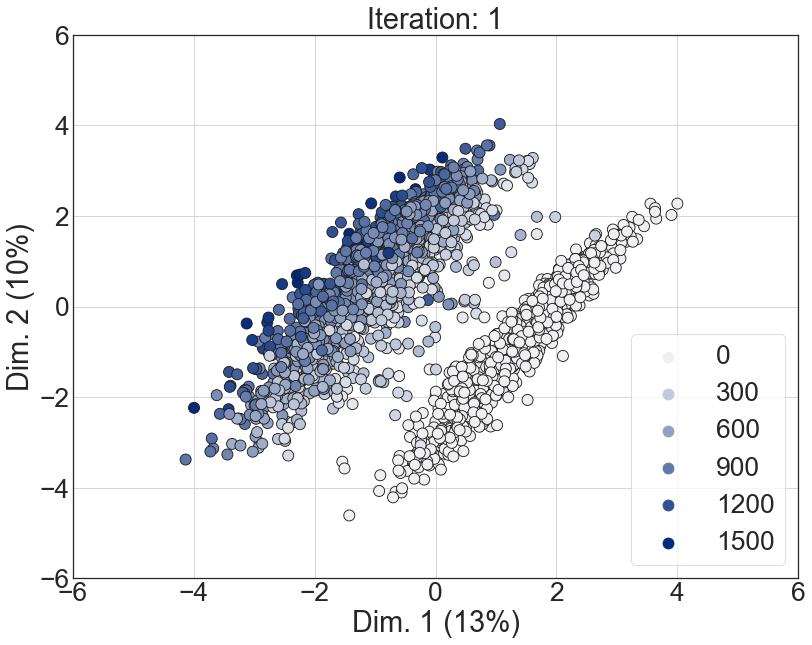

<Figure size 432x288 with 0 Axes>

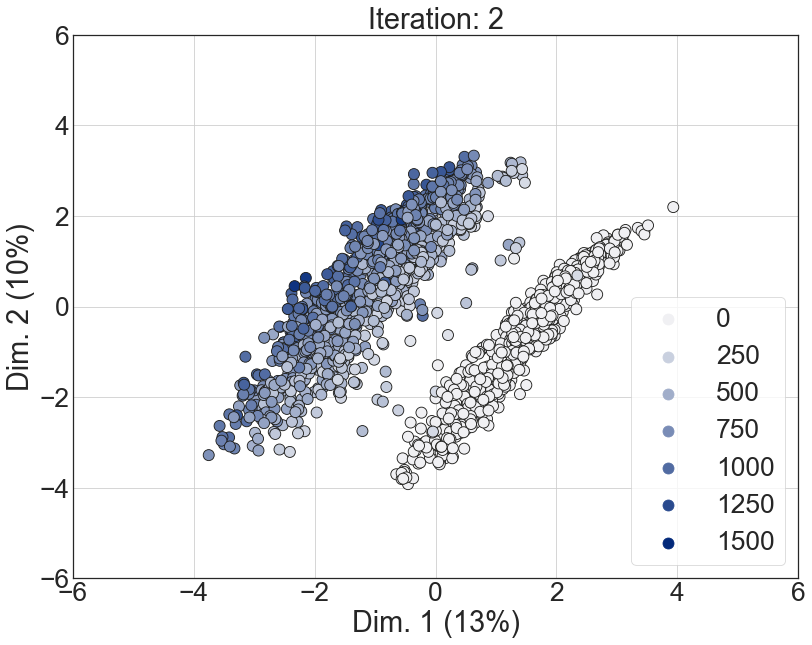

<Figure size 432x288 with 0 Axes>

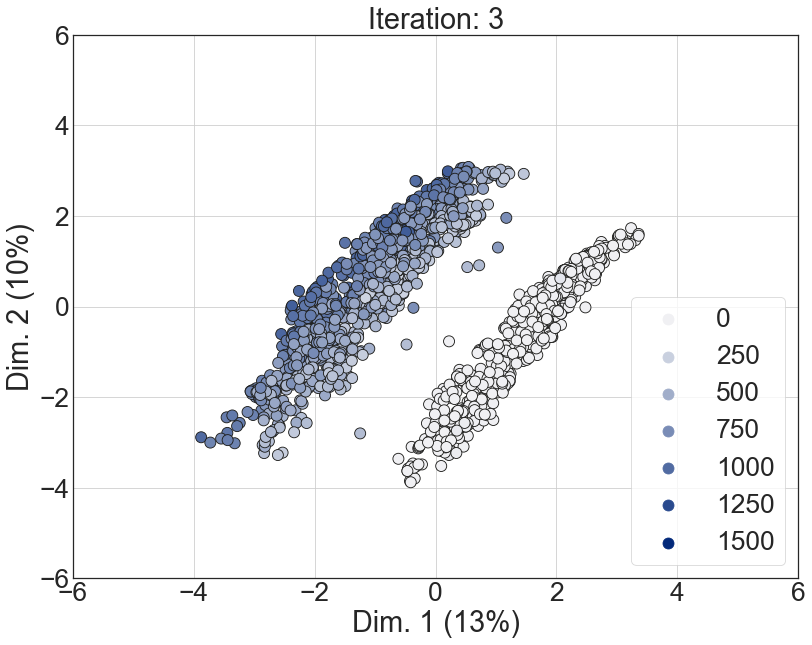

<Figure size 432x288 with 0 Axes>

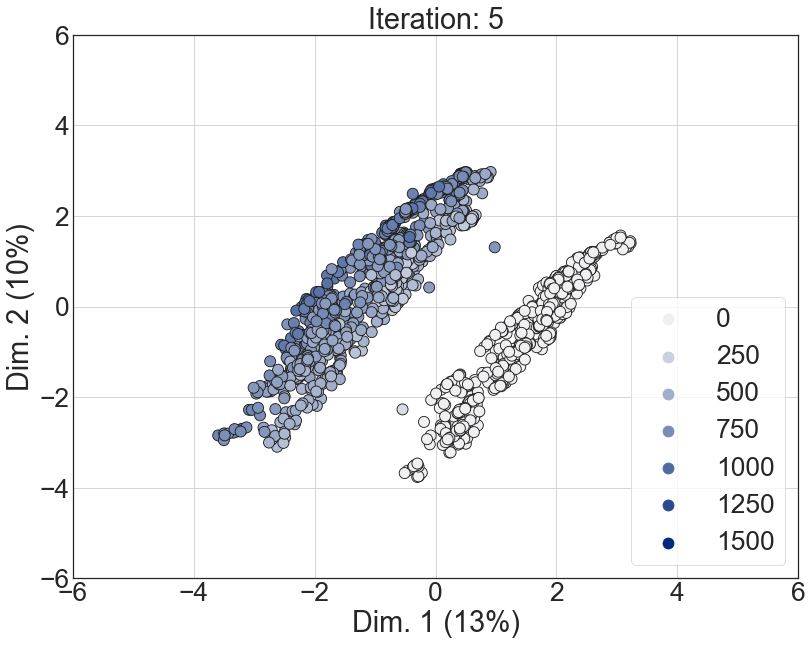

<Figure size 432x288 with 0 Axes>

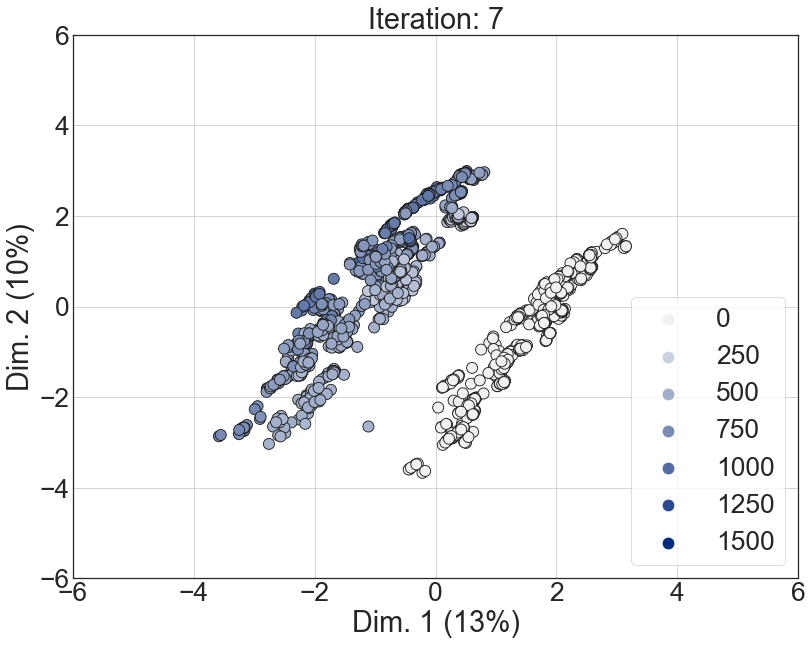

<Figure size 432x288 with 0 Axes>

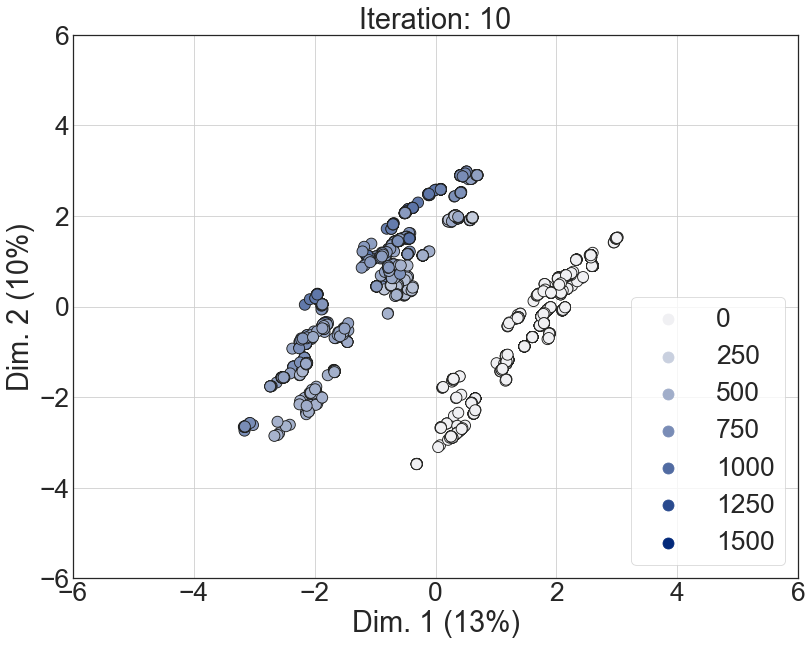

In [8]:
list = [
    (df_1_imp, 1),
    (df_2_imp, 2),
    (df_3_imp, 3),
    (df_5_imp, 5),
    (df_7_imp, 7),
    (df_10_imp, 10),
]
for df_temp in list:
    plt.figure()
    projection_plot(df_0_imp, df_temp[0], "preanti", df_temp[1])
    plt.show
    plt.savefig(
        "../../figure/aids_MESSAGED/aids_iteration_{}.svg".format(df_temp[1]),
        format="svg",
        dpi=600,
    )